In [84]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import os 
base = "Set14"
name_orders = []

In [85]:


path = base + "_siren_pixel_checkpoint"
PSNRS1 = []
SSIMS1 = []
for image_full_name in sorted(os.listdir(path)):
    image_name = image_full_name.split("_")[0]
    name_orders.append(image_name)
    image_df = pd.read_csv(os.path.join(path, image_full_name)+"/result.csv")
    PSNRS1.append(image_df.iloc[-1,3])
    SSIMS1.append(image_df.iloc[-1,4])
    
np.mean(PSNRS1), np.mean(SSIMS1)

(73.8111355383389, 0.784608059712015)

In [86]:
path = base + "_eoren_pixel_checkpoint"
PSNRS2 = []
SSIMS2 = [] 

names = [] 
for name in name_orders:
    for image_full_name in os.listdir(path):
        if name in image_full_name:
            names.append(image_full_name)
            break

for image_full_name in names:
    image_name = image_full_name.split("_")[0]
    image_df = pd.read_csv(os.path.join(path, image_full_name)+"/result.csv")
    PSNRS2.append(image_df.iloc[-1,3])
    SSIMS2.append(image_df.iloc[-1,4])
    
np.mean(PSNRS2), np.mean(SSIMS2)

(66.01194857909408, 0.46154992632847136)

In [87]:
path = base + "_siren_grad_checkpoint"
PSNRS3 = []
SSIMS3 = [] 

names = [] 
for name in name_orders:
    for image_full_name in os.listdir(path):
        if name in image_full_name:
            names.append(image_full_name)
            break

for image_full_name in names:
    image_name = image_full_name.split("_")[0]
    image_df = pd.read_csv(os.path.join(path, image_full_name)+"/result.csv")
    PSNRS3.append(image_df.iloc[-1,3])
    SSIMS3.append(image_df.iloc[-1,4])
    
np.mean(PSNRS3), np.mean(SSIMS3)

(56.46873854709601, 0.33424748931929044)

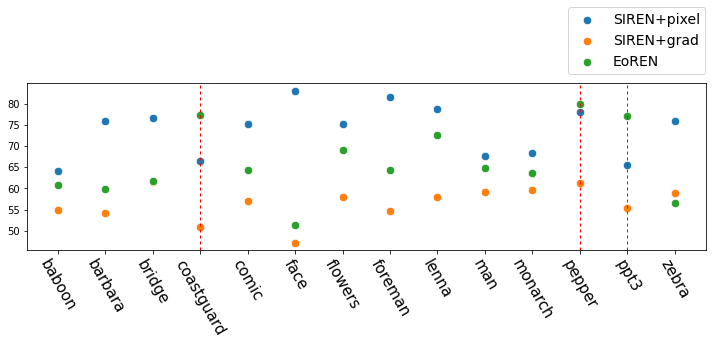

In [88]:
import seaborn as sns 

PSNRS = [PSNRS1, PSNRS2, PSNRS3]
MIN = min(map(len, PSNRS))
for i in range(3):
    PSNRS[i] = PSNRS[i][:MIN]
PSNRS = np.array(PSNRS)
import matplotlib.pyplot as plt
name_ = [n.split("_")[0] for n in names] 

plt.figure(figsize=(10,6))
sns.scatterplot(x=name_, y=PSNRS[0], s=70)
sns.scatterplot(x=name_, y=PSNRS[2], s=70)
sns.scatterplot(x=name_, y=PSNRS[1], s=70)
plt.xticks(name_, rotation=300, fontsize=15)
plt.legend(['SIREN+pixel', 'SIREN+grad', 'EoREN'], fontsize=14 , bbox_to_anchor=(1.01,1.5,0,0))
# plt.title(base)
plt.axvline("coastguard", color="r",  dashes=[3.0, 3.0], lw=1)
plt.axvline("pepper", color="r",  dashes=[3.0, 3.0], lw=1)
plt.axvline("ppt3", color="r",  dashes=[3.0, 3.0], lw=1)
plt.tight_layout()
plt.savefig("set14.pdf")
